In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
import numpy as np

In [63]:
X = np.random.normal(scale=3, size=(1000, 2))
y = X[:,0] + X[:,1] + 10*X[:,0]*X[:,1] \
    + np.random.normal(scale=0.5, size=(1000,))

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [65]:
mod_reg = LinearRegression()
mod_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
linear_preds = mod_reg.predict(X_test)

In [67]:
mod_reg.score(X_test, y_test)

-0.0028030369128240196

In [68]:
mod_tree = RandomForestRegressor(n_estimators=1000, min_samples_leaf=3)
mod_tree.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [69]:
mod_tree.score(X_test, y_test)

0.9206140239561087

In [70]:
tree_preds = mod_tree.predict(X_test)

In [71]:
def abline(intercept, slope):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', c='orange')

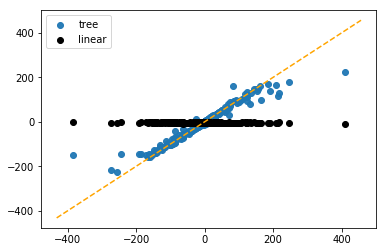

In [72]:
plt.scatter(y_test, tree_preds, alpha=0.95)
plt.scatter(y_test, linear_preds, c='k')
plt.legend(labels=['tree', 'linear'])
abline(0, 1)